In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose



In [ ]:
from google.colab import files
uploaded = files.upload()


df = pd.read_csv("timeseries.csv", parse_dates=["Date"], index_col="Date")


df.head()


Saving timeseries.csv to timeseries (4).csv


,A,B,C,D,E,F,G
Date,,,,,,,
2008-03-18,24.68,164.93,114.73,26.27,19.21,28.87,63.44
2008-03-19,24.18,164.89,114.75,26.22,19.07,27.76,59.98
2008-03-20,23.99,164.63,115.04,25.78,19.01,27.04,59.61
2008-03-25,24.14,163.92,114.85,27.41,19.61,27.84,59.41
2008-03-26,24.44,163.45,114.84,26.86,19.53,28.02,60.09


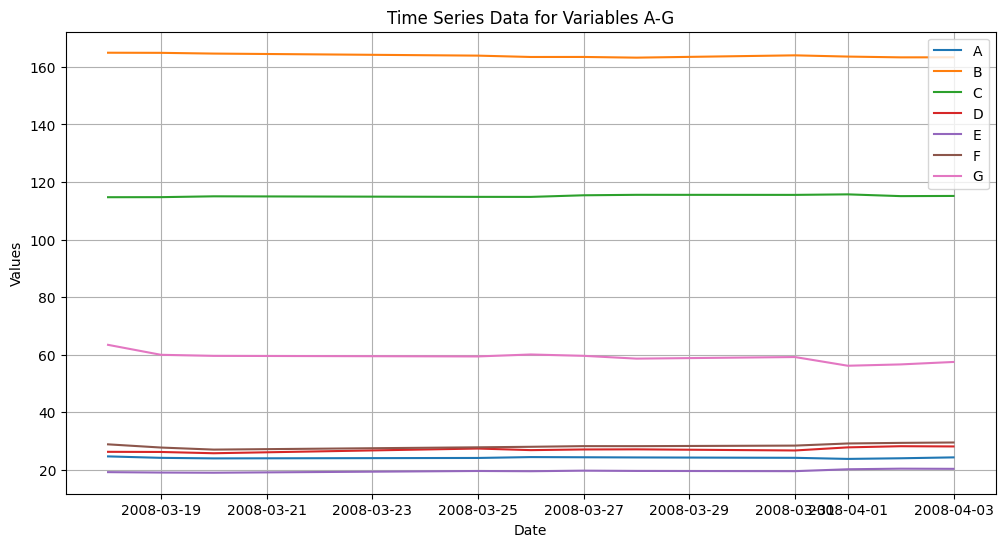

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
for column in df.columns:
    plt.plot(df.index, df[column], label=column)

plt.xlabel("Date")
plt.ylabel("Values")
plt.title("Time Series Data for Variables A-G")
plt.legend()
plt.grid(True)
plt.show()


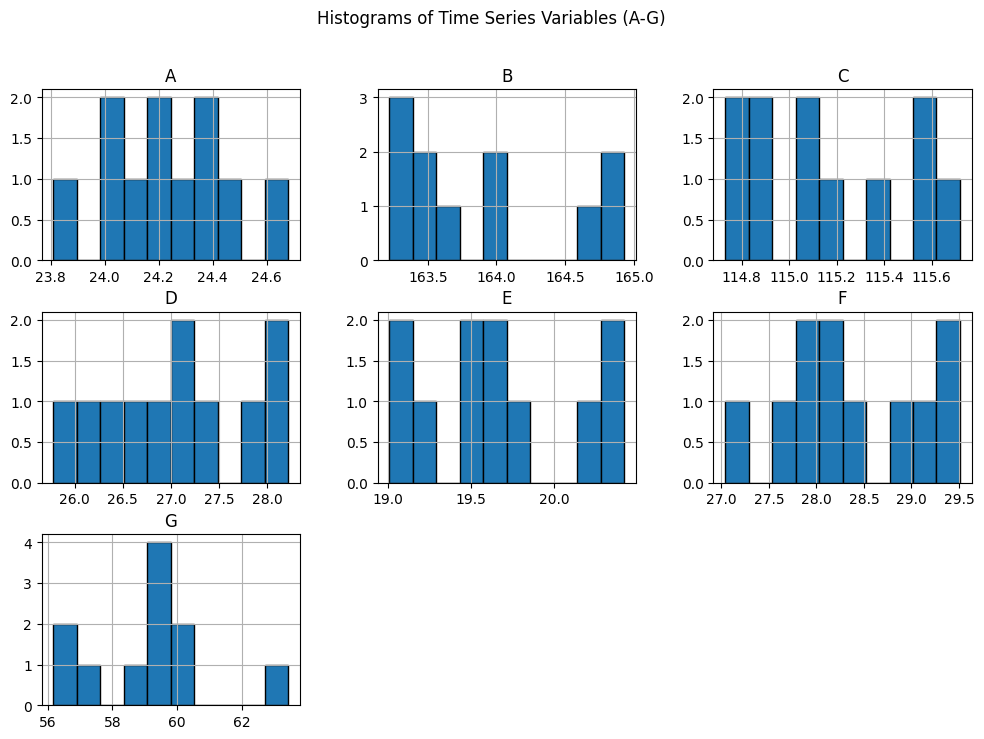

In [ ]:
# Plot histograms for all numerical columns
df.hist(figsize=(12, 8), bins=10, edgecolor="black")
plt.suptitle("Histograms of Time Series Variables (A-G)")
plt.show()


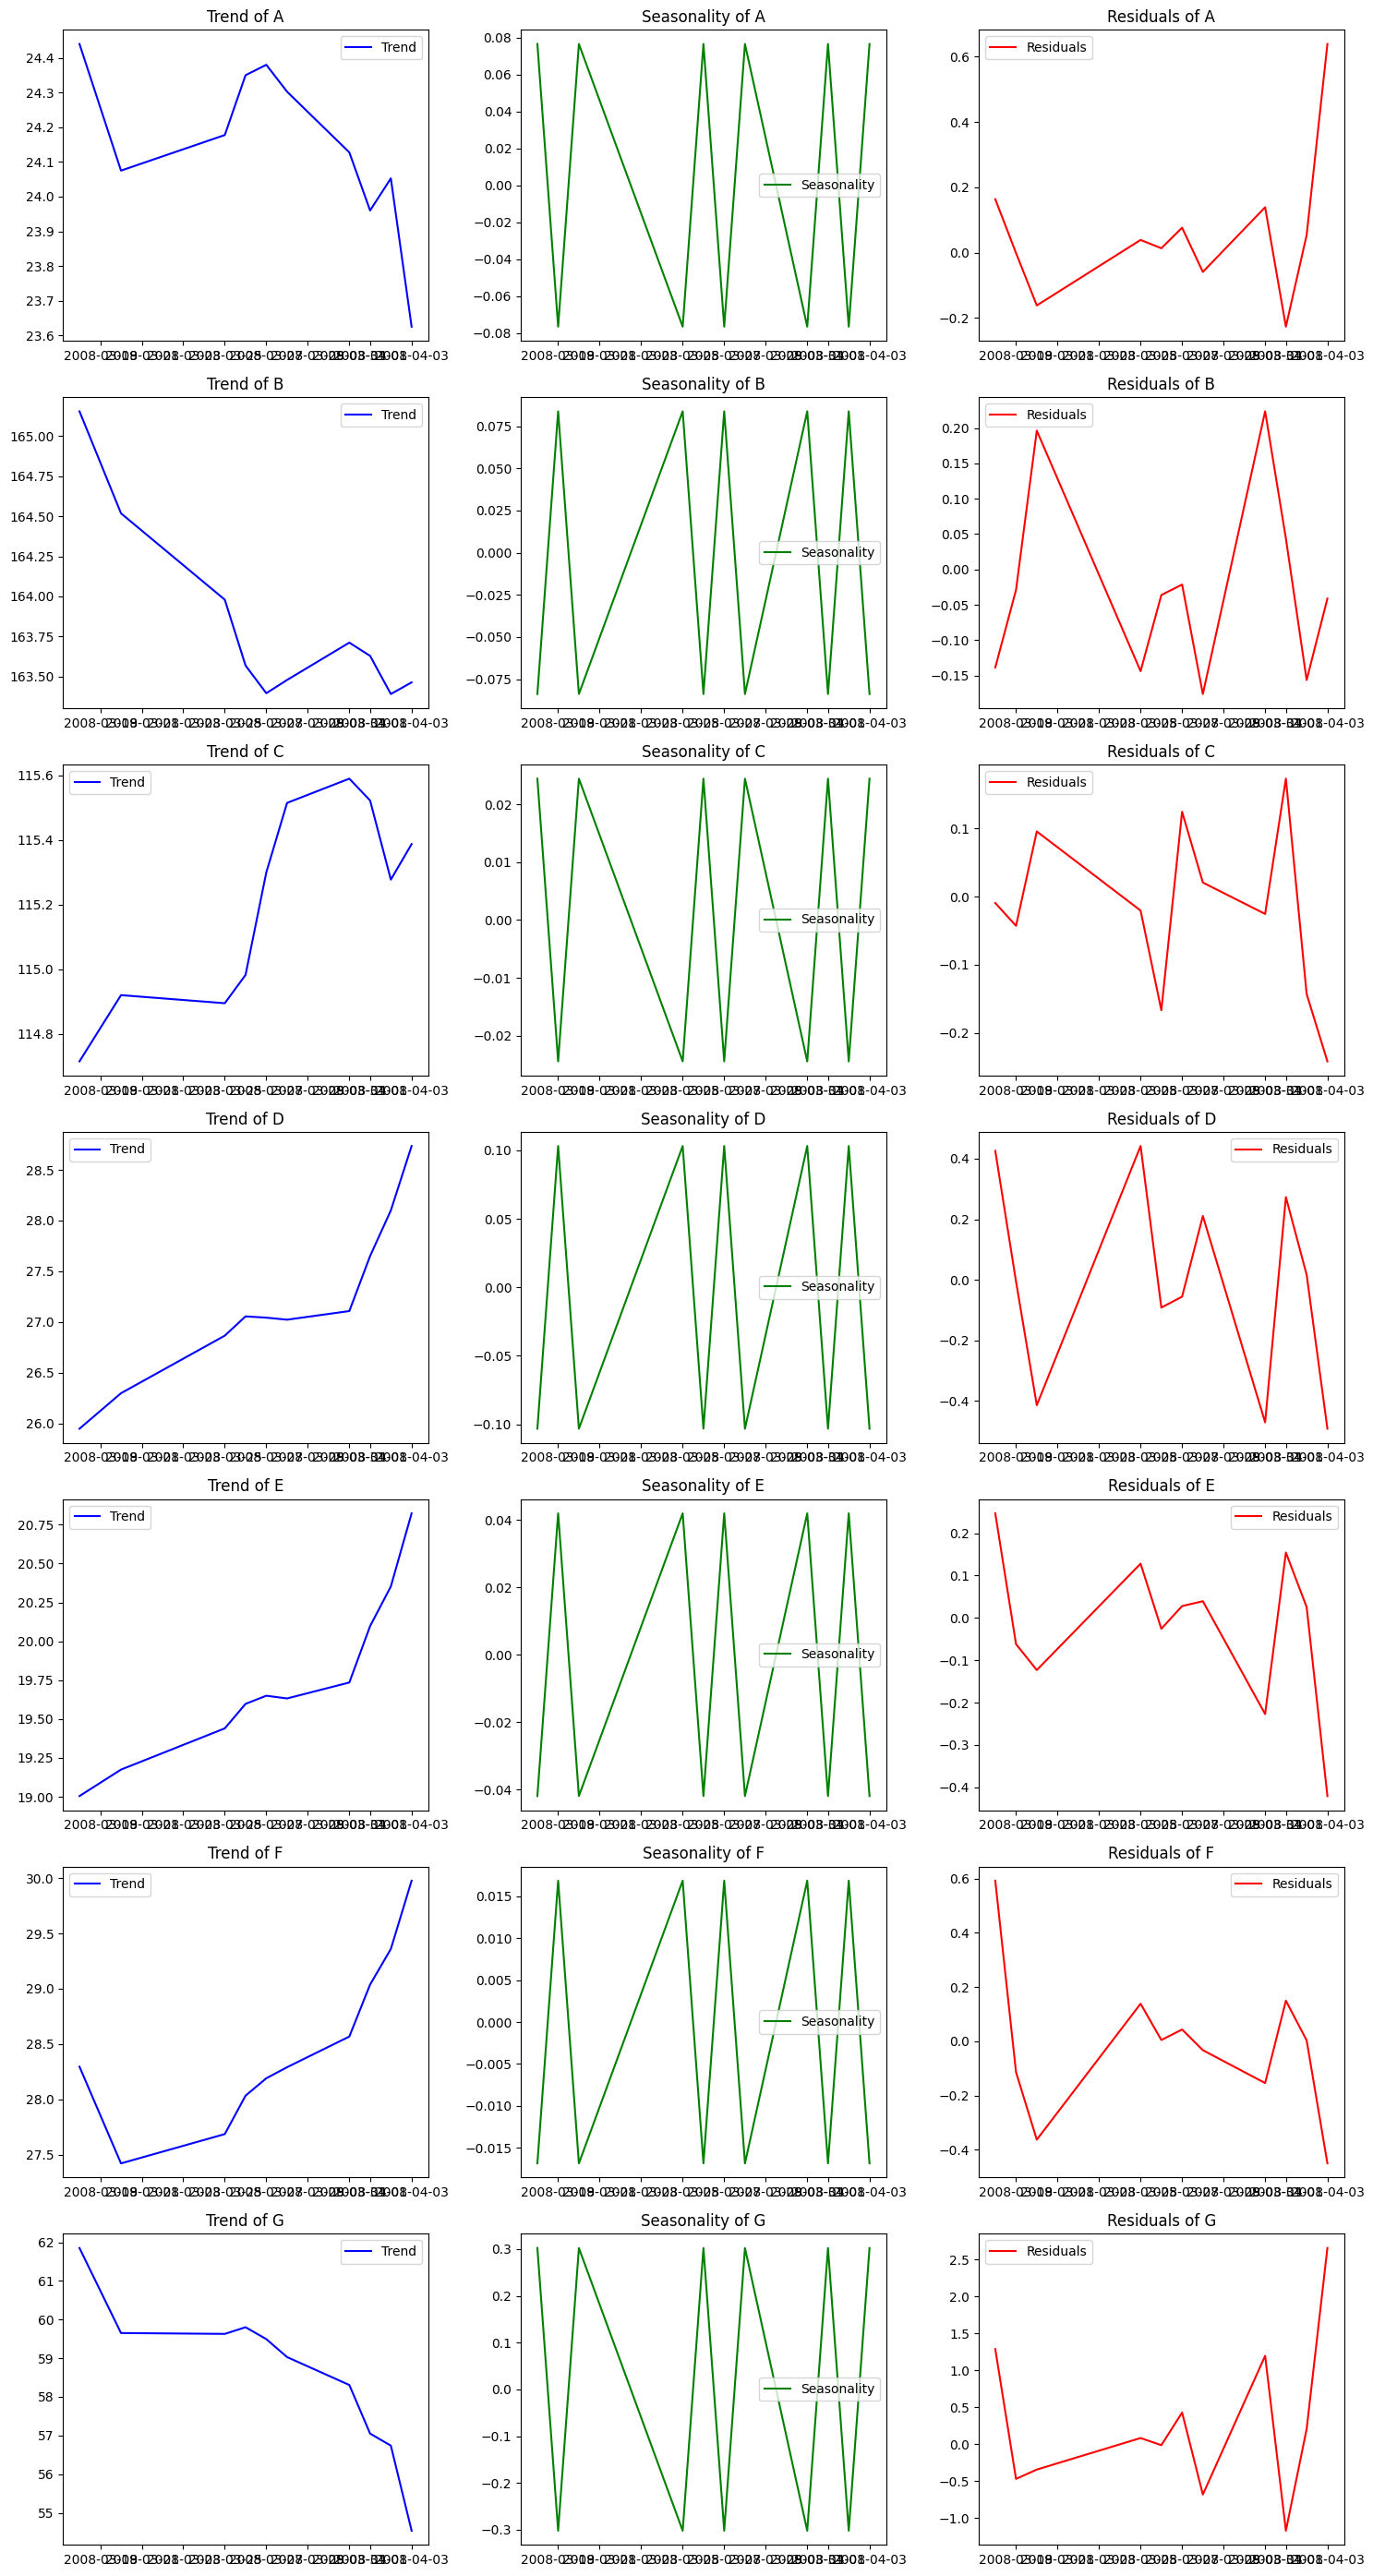

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition for each column
fig, axes = plt.subplots(nrows=len(df.columns), ncols=3, figsize=(15, 4 * len(df.columns)))

for i, column in enumerate(df.columns):
    decomposition = seasonal_decompose(df[column], model="additive", period=2, extrapolate_trend="freq")

    axes[i, 0].plot(df.index, decomposition.trend, label="Trend", color="blue")
    axes[i, 0].set_title(f"Trend of {column}")
    axes[i, 0].legend()

    axes[i, 1].plot(df.index, decomposition.seasonal, label="Seasonality", color="green")
    axes[i, 1].set_title(f"Seasonality of {column}")
    axes[i, 1].legend()

    axes[i, 2].plot(df.index, decomposition.resid, label="Residuals", color="red")
    axes[i, 2].set_title(f"Residuals of {column}")
    axes[i, 2].legend()

plt.tight_layout()
plt.show()
